In [45]:
import torch
import matplotlib.pyplot as plt

The parameters are w=0.8877782821655273, b=0.9936695694923401, and loss=10.153912544250488
The parameters are w=0.8454914689064026, b=0.9912717342376709, and loss=1.4566775560379028
The parameters are w=0.8295575976371765, b=0.9903557896614075, and loss=0.2217213660478592
The parameters are w=0.8235540986061096, b=0.9899982810020447, and loss=0.04636411741375923
The parameters are w=0.821292519569397, b=0.989851176738739, and loss=0.021464206278324127
The parameters are w=0.8204410076141357, b=0.9897833466529846, and loss=0.017928214743733406
The parameters are w=0.8201208114624023, b=0.9897454380989075, and loss=0.01742570288479328
The parameters are w=0.8200008869171143, b=0.9897187948226929, and loss=0.01735403947532177
The parameters are w=0.8199564218521118, b=0.9896963834762573, and loss=0.0173435527831316
The parameters are w=0.8199403285980225, b=0.9896755814552307, and loss=0.017341721802949905


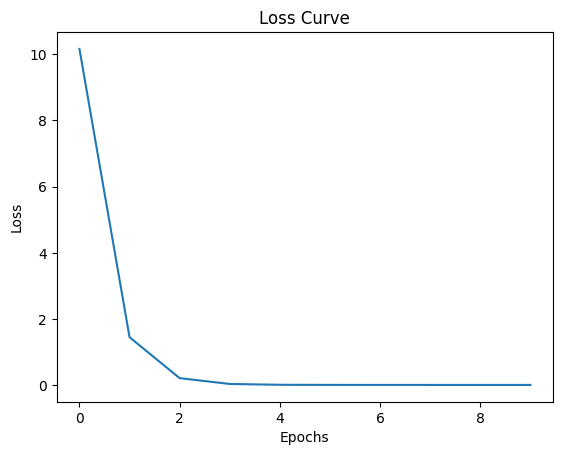

In [49]:
################################ Q1 linear reg
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])
if torch.cuda.is_available():
    x = x.to(device="cuda")
    y = y.to(device="cuda")

# prediction y_p = wx + b
w, b = torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)  # given
learning_rate = torch.tensor(0.001)

loss_list = []

for epochs in range(10):
    loss = 0.0
    
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j]) ** 2
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
    print(f"The parameters are w={w}, b={b}, and loss={loss.item()}")
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Epoch 1: w = 1.1740000247955322, b = 1.0520000457763672, Loss = 757.0
Epoch 2: w = 1.344208002090454, b = 1.1028521060943604, Loss = 724.3797607421875


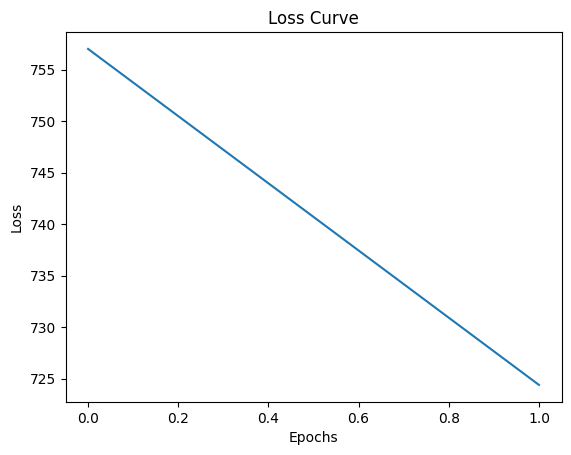

Final values after 2 epochs: w = 1.344208002090454, b = 1.1028521060943604


In [50]:
################################ Q2
# Data
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])
if torch.cuda.is_available():
    x = x.to(device="cuda")
    y = y.to(device="cuda")

# Initializing parameters
w, b = torch.tensor(1.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)  # given
learning_rate = torch.tensor(0.001)

# Store loss values to plot later
loss_list = []

# Number of epochs
for epoch in range(2):  # Looping over two epochs
    loss = 0.0
    
    # Looping through all data points (x, y)
    for j in range(len(x)):
        # Linear model prediction y_p = wx + b
        y_p = w * x[j] + b
        loss += (y_p - y[j]) ** 2  # Sum of squared differences (MSE)

    # Average loss for the entire dataset
    loss = loss / len(x)
    loss_list.append(loss.item())
    
    # Backpropagation
    loss.backward()
    
    # Gradient Descent Step (update parameters)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Reset gradients to zero
    w.grad.zero_()
    b.grad.zero_()

    # Printing the values after each epoch
    print(f"Epoch {epoch+1}: w = {w.item()}, b = {b.item()}, Loss = {loss.item()}")

# Plotting loss over epochs
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Output w and b after two epochs 
print(f"Final values after 2 epochs: w = {w.item()}, b = {b.item()}")


In [57]:
############################## Q3
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)
        if torch.cuda.is_available():
            self.w = self.w.to(device="cuda")
            self.b = self.b.to(device="cuda")
    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj, y_p):
    return (yj - y_p)**2
    
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])
learning_rate = torch.tensor(0.001)
if torch.cuda.is_available():
    x = x.to(device="cuda")
    y = y.to(device="cuda")
    learning_rate = learning_rate.to(device="cuda")
model = RegressionModel()

loss_list = []

for epochs in range(10):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)

    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()

    print(f"The parameters are w={model.w}, b={model.b}, and loss={loss.item()}")

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

/tmp/ipykernel_7280/1271193346.py:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  self.w -= learning_rate * self.w.grad


TypeError: unsupported operand type(s) for *: 'Tensor' and 'NoneType'